# Exploring the UTx000 Dataset
From the first cohort in Spring 2020

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Bluetooth Processing
I don't even know what to expect with this dataset.

In [3]:
import os

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

# Test Data Import
We want to import some data from participants so that we can understand it a little bit more.

## One datafile

In [3]:
raw = pd.read_csv('/Volumes/HEF_Dissertation_Research/utx000/bpeace1/beiwe/bluetooth/25rlmdr1/bluetooth/2020-01-24 23_00_00.csv')
raw

,timestamp,UTC time,hashed MAC,RSSI
0,1579910140611,2020-01-24T23:55:40.611,73cZ5pb4-8mNifVfF2Gx3j9MfKnzAU8iqlU_2YIJgcZ9jN...,-63
1,1579910140628,2020-01-24T23:55:40.628,B2WF8gAcWO3tdIThKp9OJ4TTNKs9QgYNE5TqV3XUgahEOJ...,-75
2,1579910140654,2020-01-24T23:55:40.654,ae3cw_kBKVrrusCFKPGkda5FGFA83A7WlLdT32m38lzdQH...,-95
3,1579910140663,2020-01-24T23:55:40.663,0osgqY-O4Mduw-qC5ngxdGOwWv0hlRXoOBzFeZQWyZFlHY...,-77
4,1579910140686,2020-01-24T23:55:40.686,sOtvApjVl7yKK94lnUFWyFhTQPdGTT7ZthQcjB-U3tMUhY...,-60
...,...,...,...,...
1089,1579910199895,2020-01-24T23:56:39.895,QqRCZy3KCJrxJvIXojGUcchF-4kYZlo7cgbBa_gVapESbD...,-64
1090,1579910199904,2020-01-24T23:56:39.904,RiAYxRmV6GuDmm2BSxyLoLjbkqObmVhjKlJRuP_DiLZrzH...,-77
1091,1579910199937,2020-01-24T23:56:39.937,b32KTplp0NIdrTAIpBfW_coQ6S--0jepIFp2xncW4PmFE4...,-68
1092,1579910200154,2020-01-24T23:56:40.154,sOtvApjVl7yKK94lnUFWyFhTQPdGTT7ZthQcjB-U3tMUhY...,-83


## One participant

In [4]:
pt_dir = '/Volumes/HEF_Dissertation_Research/utx000/bpeace1/beiwe/bluetooth/25rlmdr1/bluetooth/'
pt_df = pd.DataFrame()
for file in os.listdir(pt_dir):
    temp = pd.read_csv(f'{pt_dir}{file}',parse_dates = [1],infer_datetime_format=True,index_col=1)
    pt_df = pt_df.append(temp)
    
pt_df.head()

,timestamp,hashed MAC,RSSI
UTC time,,,
2020-01-24 23:55:40.611,1579910140611,73cZ5pb4-8mNifVfF2Gx3j9MfKnzAU8iqlU_2YIJgcZ9jN...,-63
2020-01-24 23:55:40.628,1579910140628,B2WF8gAcWO3tdIThKp9OJ4TTNKs9QgYNE5TqV3XUgahEOJ...,-75
2020-01-24 23:55:40.654,1579910140654,ae3cw_kBKVrrusCFKPGkda5FGFA83A7WlLdT32m38lzdQH...,-95
2020-01-24 23:55:40.663,1579910140663,0osgqY-O4Mduw-qC5ngxdGOwWv0hlRXoOBzFeZQWyZFlHY...,-77
2020-01-24 23:55:40.686,1579910140686,sOtvApjVl7yKK94lnUFWyFhTQPdGTT7ZthQcjB-U3tMUhY...,-60


### Visualizing to see gaps

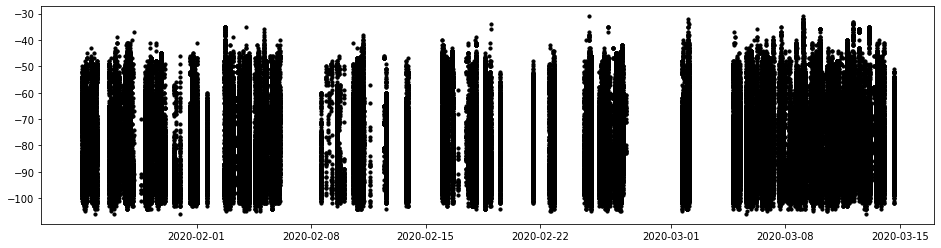

In [6]:
fig, ax = plt.subplots(figsize=(16,4))
ax.scatter(pt_df.index, pt_df['RSSI'],s=10,color='black')
plt.show()
plt.close()

### Downsampling analysis

Can't really do any downsampling because the bluetooth addresses seem unique at each time step. So, the processing will simply be appending the data together into one giant file.

# Processing Pipeline

In [11]:
data_dir = '/Volumes/HEF_Dissertation_Research/utx000/bpeace1/beiwe/bluetooth/'
bt_df = pd.DataFrame()
for pt in os.listdir(data_dir)[:4]:
    if len(pt) == 8:
        print(f'\t\tWorking for participant {pt}')
        pt_df = pd.DataFrame()
        for file in os.listdir(f'{data_dir}{pt}/bluetooth/'):
            if file[-1] == 'v':
                temp = pd.read_csv(f'{data_dir}{pt}/bluetooth/{file}',parse_dates=[1],infer_datetime_format=True,engine='python')
                pt_df = pt_df.append(temp)
            
        pt_df['UTC time'] = pd.to_datetime(pt_df['UTC time'])
        pt_df['Time'] = pt_df['UTC time'] - timedelta(hours=6)
        pt_df.set_index('Time',inplace=True)
        pt_df['Beiwe'] = pt
        
        bt_df = bt_df.append(pt_df)
    
bt_df.head()

		Working for participant 25rlmdr1
		Working for participant 3onrr6vt
		Working for participant 63uo1uuj
		Working for participant 7373cjon


,timestamp,UTC time,hashed MAC,RSSI,Beiwe
Time,,,,,
2020-01-24 17:55:40.611,1579910140611,2020-01-24 23:55:40.611,73cZ5pb4-8mNifVfF2Gx3j9MfKnzAU8iqlU_2YIJgcZ9jN...,-63,25rlmdr1
2020-01-24 17:55:40.628,1579910140628,2020-01-24 23:55:40.628,B2WF8gAcWO3tdIThKp9OJ4TTNKs9QgYNE5TqV3XUgahEOJ...,-75,25rlmdr1
2020-01-24 17:55:40.654,1579910140654,2020-01-24 23:55:40.654,ae3cw_kBKVrrusCFKPGkda5FGFA83A7WlLdT32m38lzdQH...,-95,25rlmdr1
2020-01-24 17:55:40.663,1579910140663,2020-01-24 23:55:40.663,0osgqY-O4Mduw-qC5ngxdGOwWv0hlRXoOBzFeZQWyZFlHY...,-77,25rlmdr1
2020-01-24 17:55:40.686,1579910140686,2020-01-24 23:55:40.686,sOtvApjVl7yKK94lnUFWyFhTQPdGTT7ZthQcjB-U3tMUhY...,-60,25rlmdr1


In [12]:
temp = pd.read_csv('../data/processed/bpeace1-gps.csv')

In [13]:
temp

,Time,Lat,Long,Alt,Accuracy,UTC,Beiwe
